In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
962,2020-07-12,United Kingdom,289118.0,288953.0,44787.0,44798.0,165.0,-11.0
963,2020-07-12,Germany,199022.0,198804.0,9075.0,9063.0,218.0,12.0
964,2020-07-12,Iran,256001.0,255117.0,12639.0,12635.0,884.0,4.0
965,2020-07-12,Turkey,211943.0,211981.0,5340.0,5344.0,-38.0,-4.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2804.23784901758
RMSE =  6792.2255663941005


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  302.0382626680455
RMSE =  699.4558078206982


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  13998.382978723404
RMSE =  17921.83737077984
-- World performances for deaths --
MAE =  1557.276595744681
RMSE =  1894.4240240713596


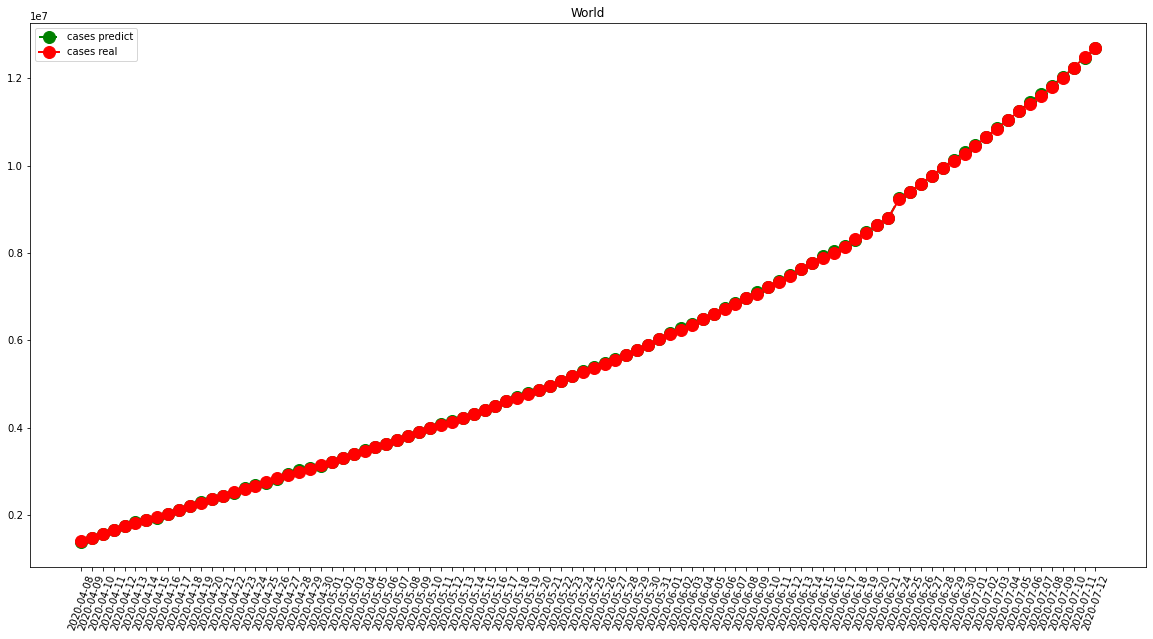

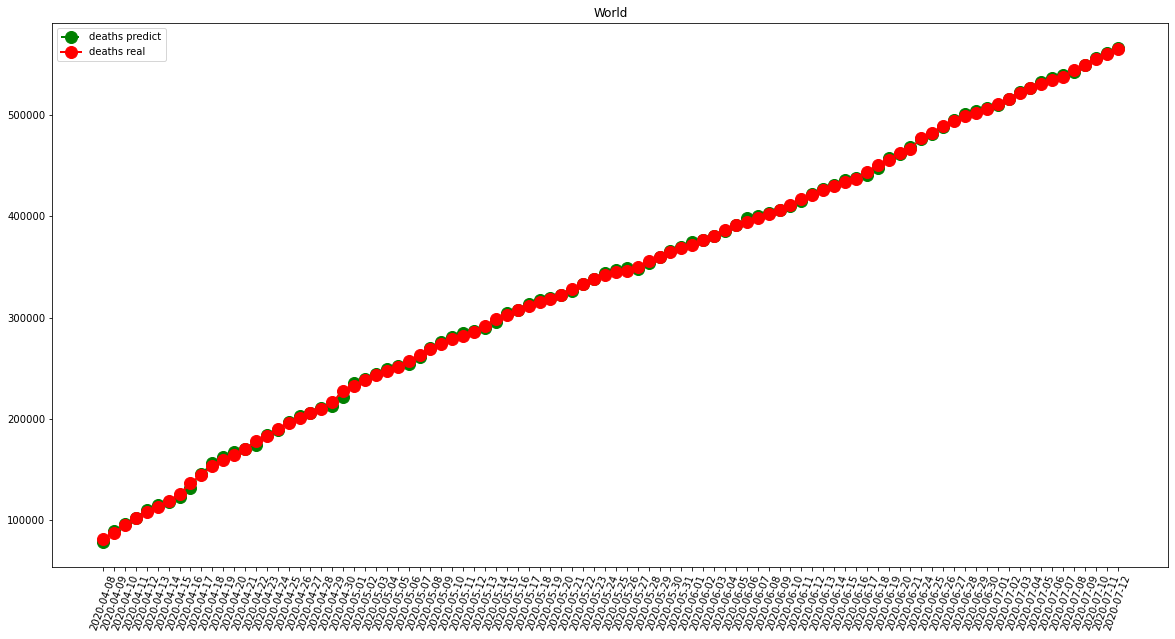

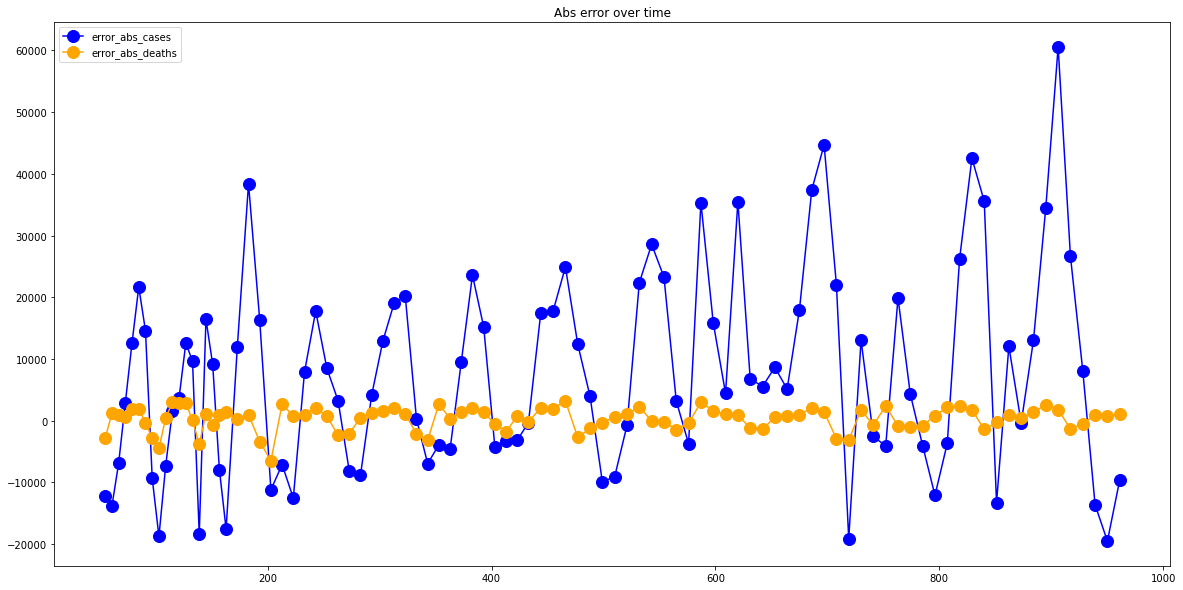

In [7]:
visShow("World")

-- France performances for cases --
MAE =  857.3173076923077
RMSE =  1423.3823983466555
-- France performances for deaths --
MAE =  170.08653846153845
RMSE =  328.45352967177286


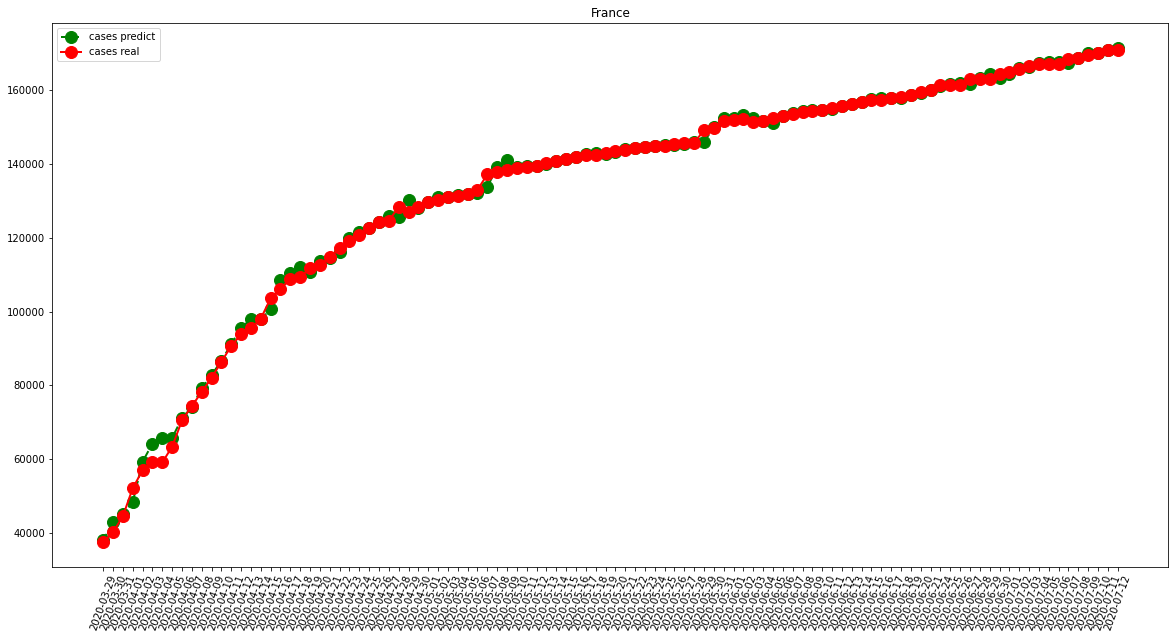

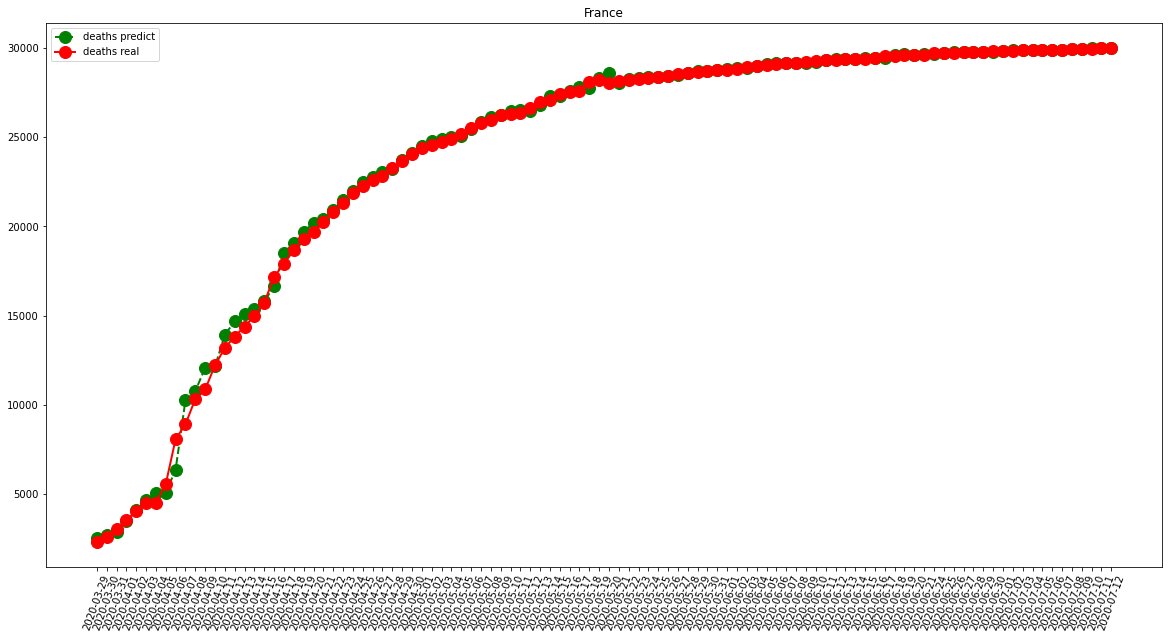

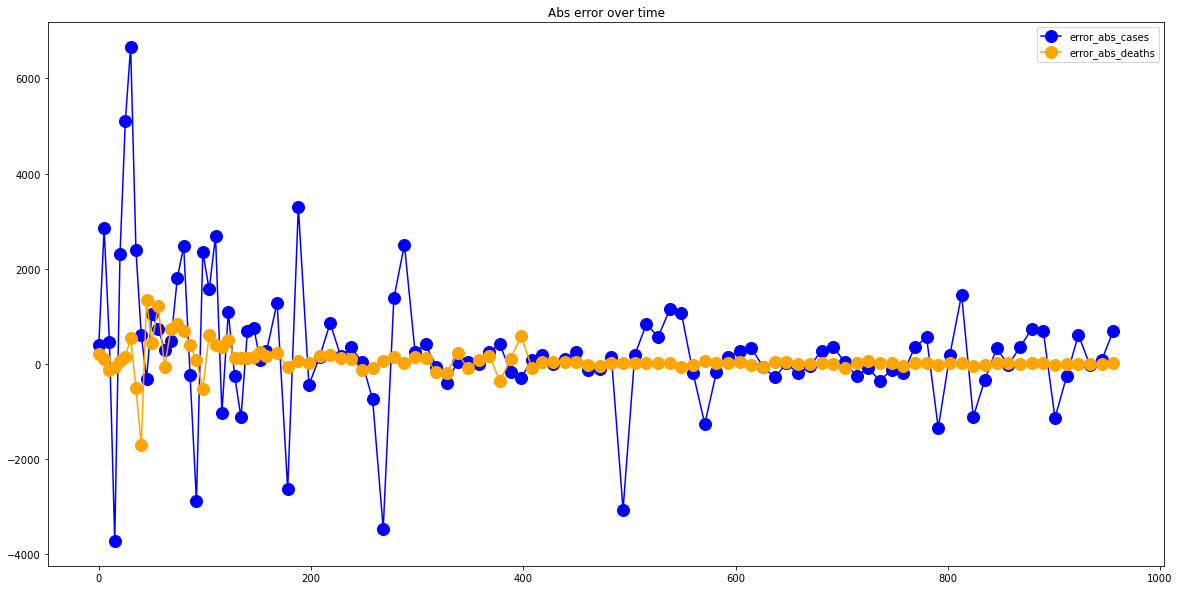

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  361.9519230769231
RMSE =  532.442024651872
-- Italy performances for deaths --
MAE =  94.77884615384616
RMSE =  290.0438461548662


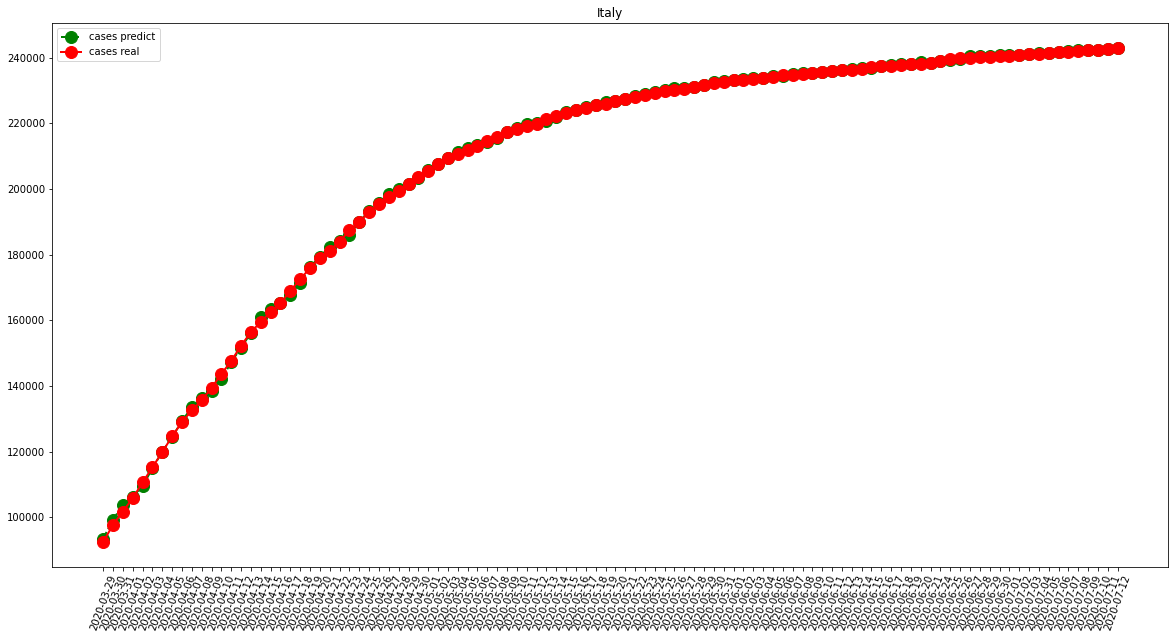

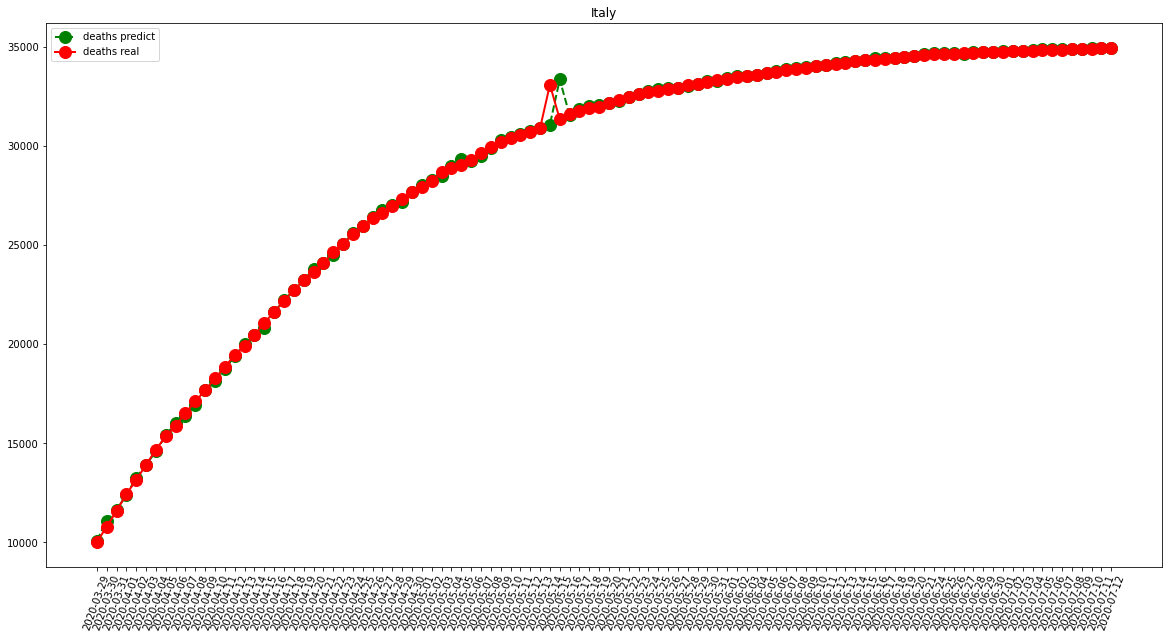

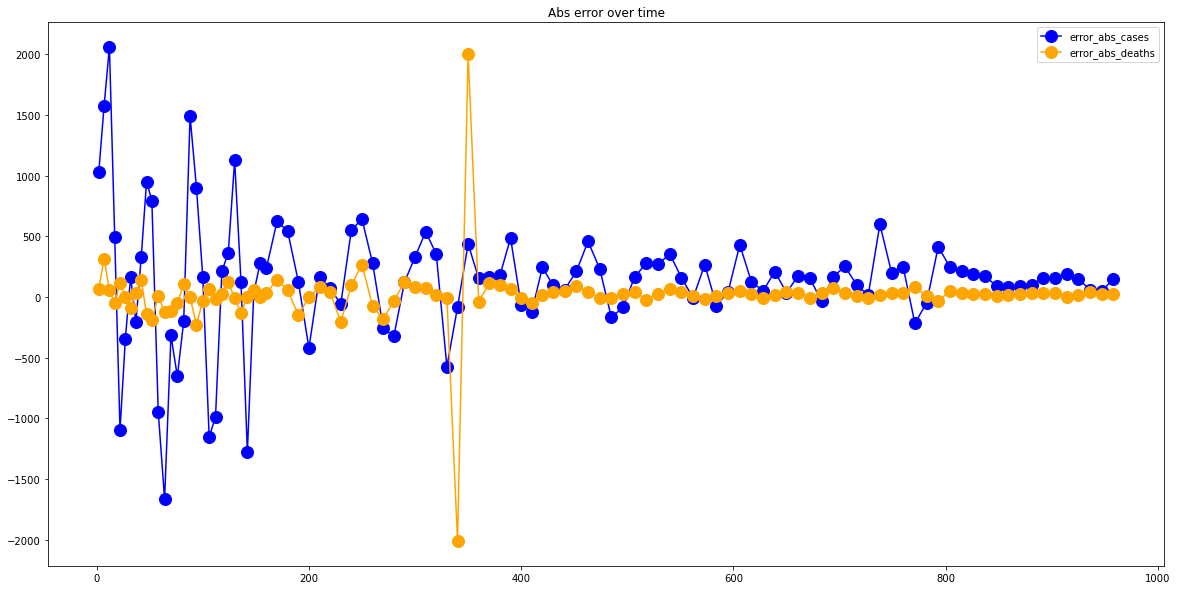

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  838.7211538461538
RMSE =  2011.4084689207596
-- Spain performances for deaths --
MAE =  174.9903846153846
RMSE =  398.01156003698804


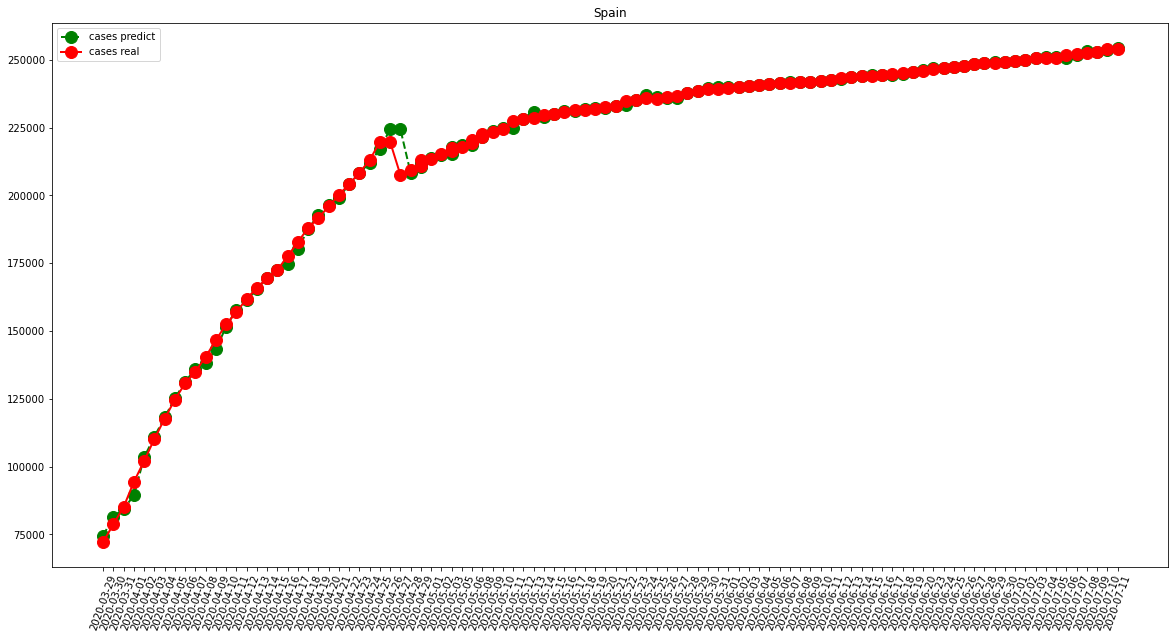

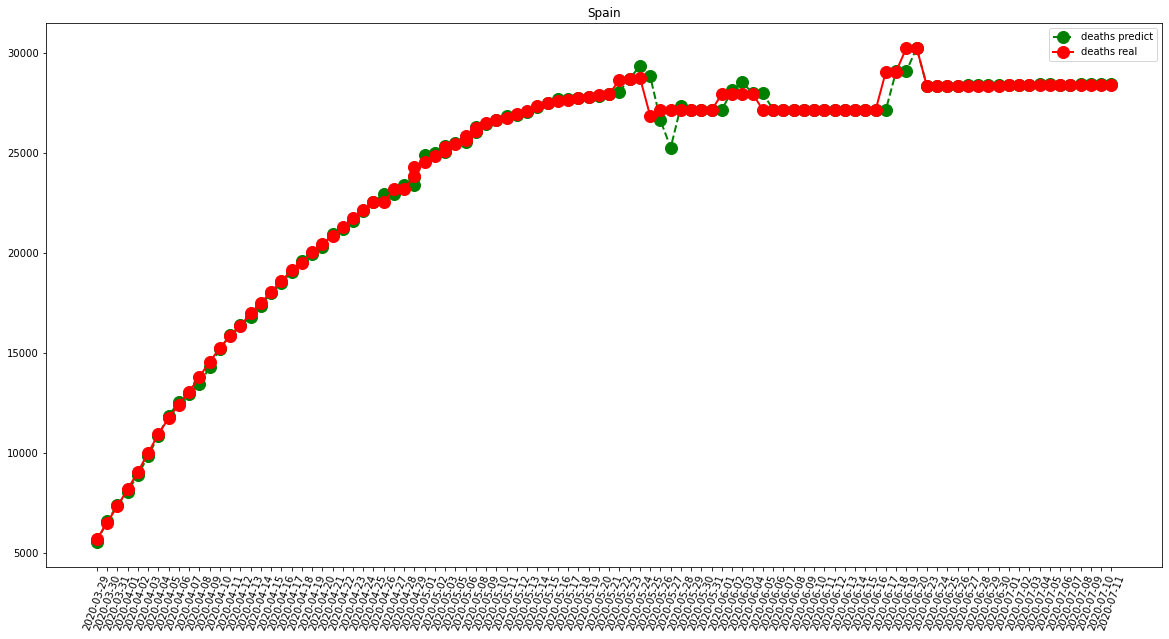

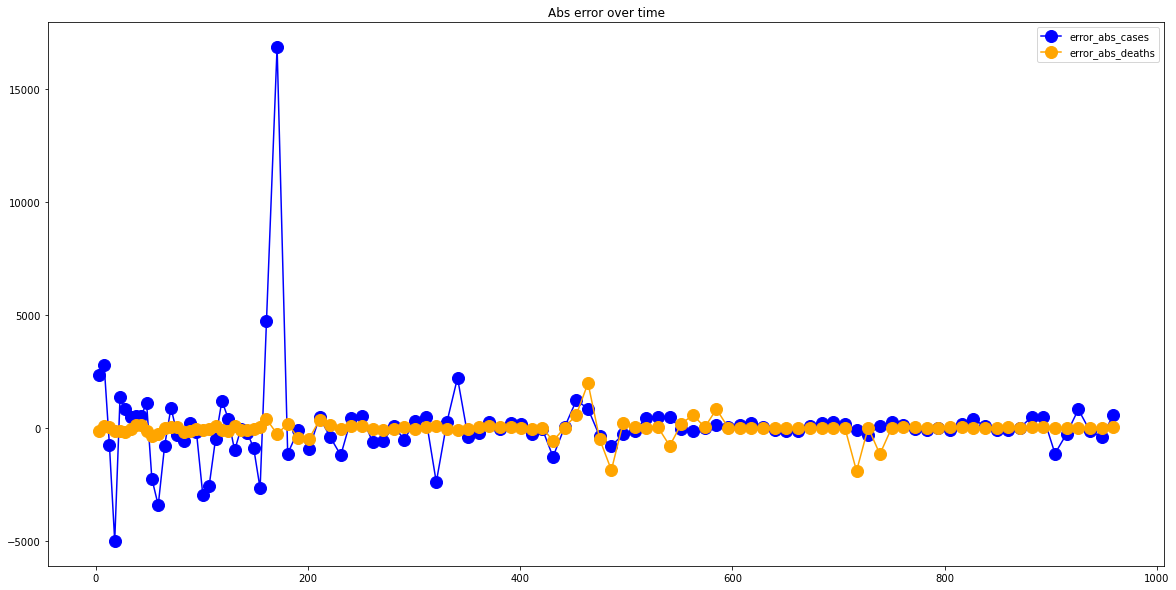

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5219.807692307692
RMSE =  7070.217987064853
-- United States performances for deaths --
MAE =  526.6730769230769
RMSE =  768.6555570505006


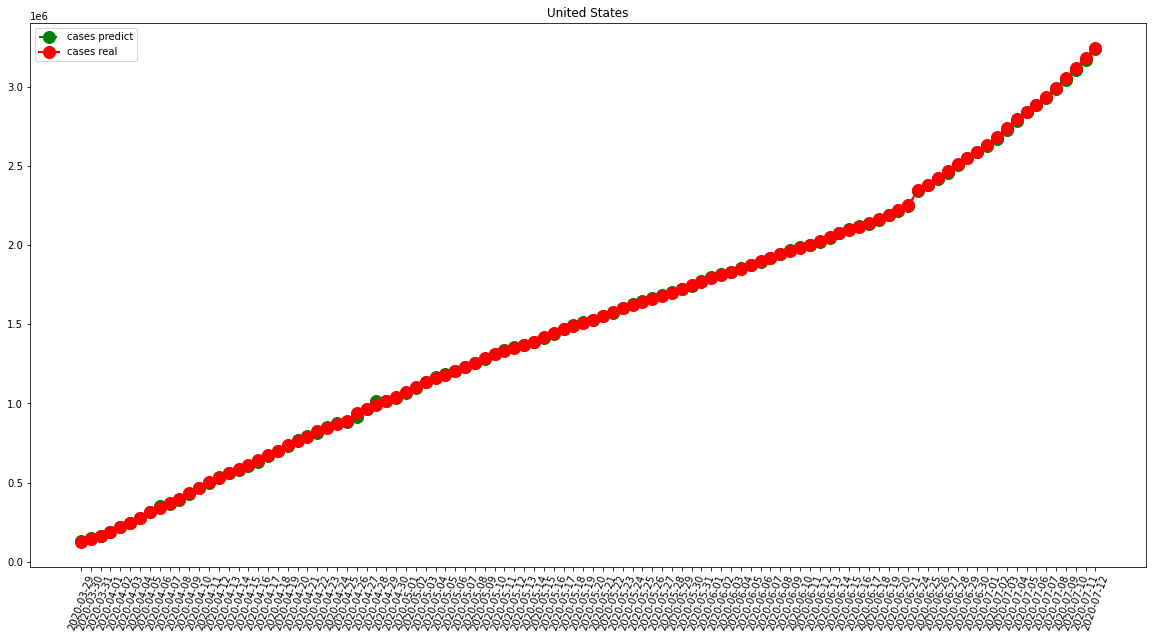

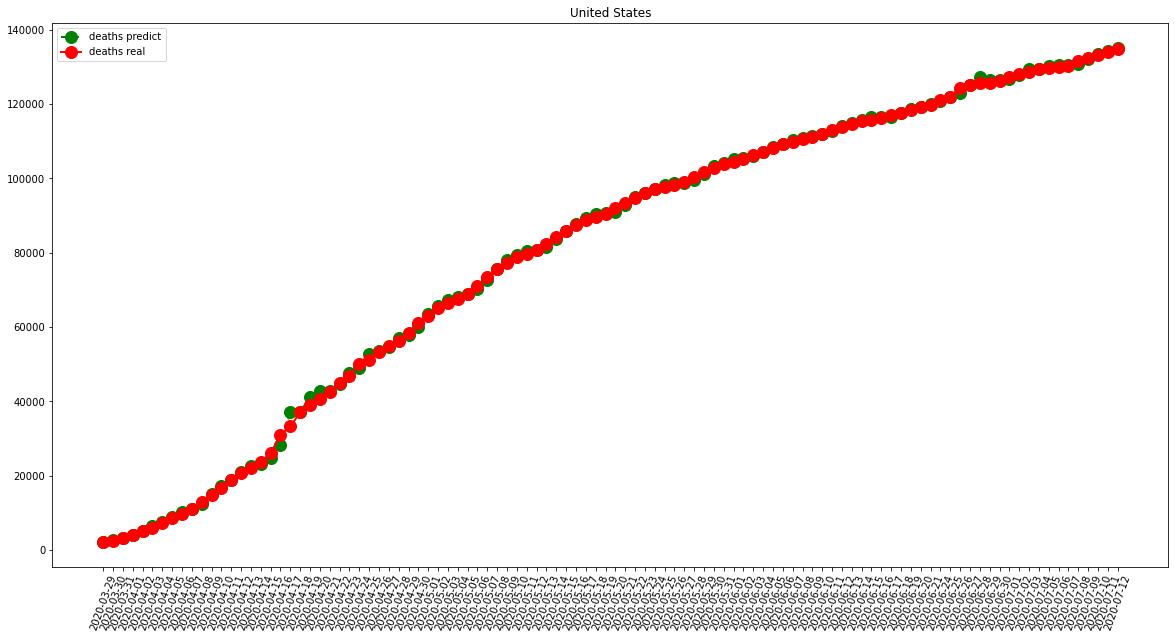

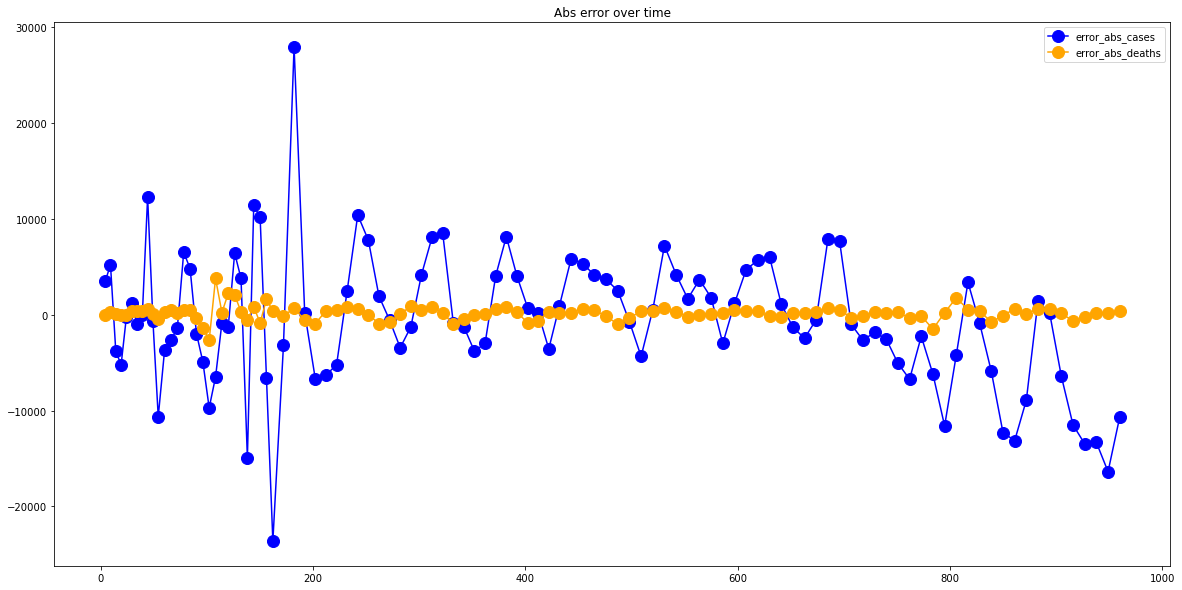

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  86.64423076923077
RMSE =  115.67307212737377
-- China performances for deaths --
MAE =  37.29807692307692
RMSE =  153.9134684464968


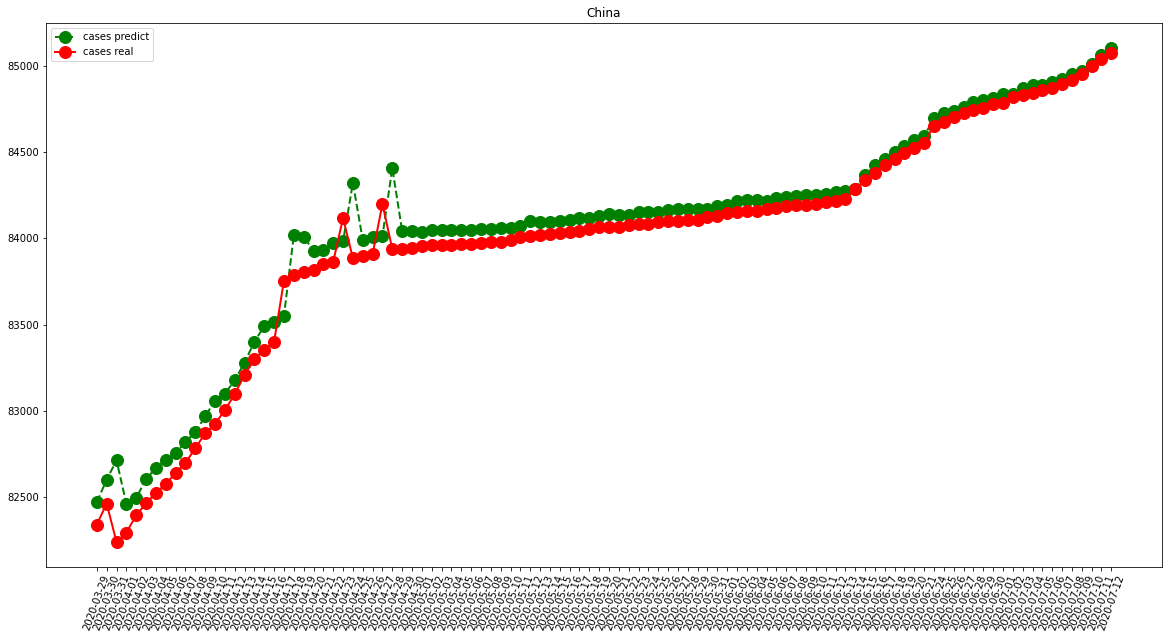

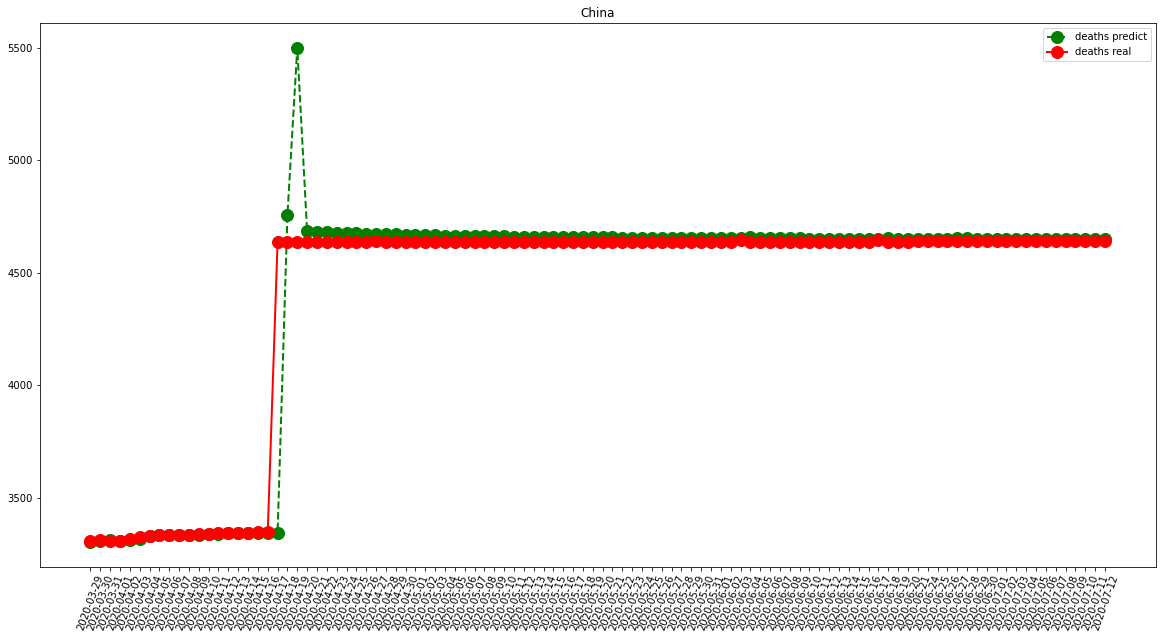

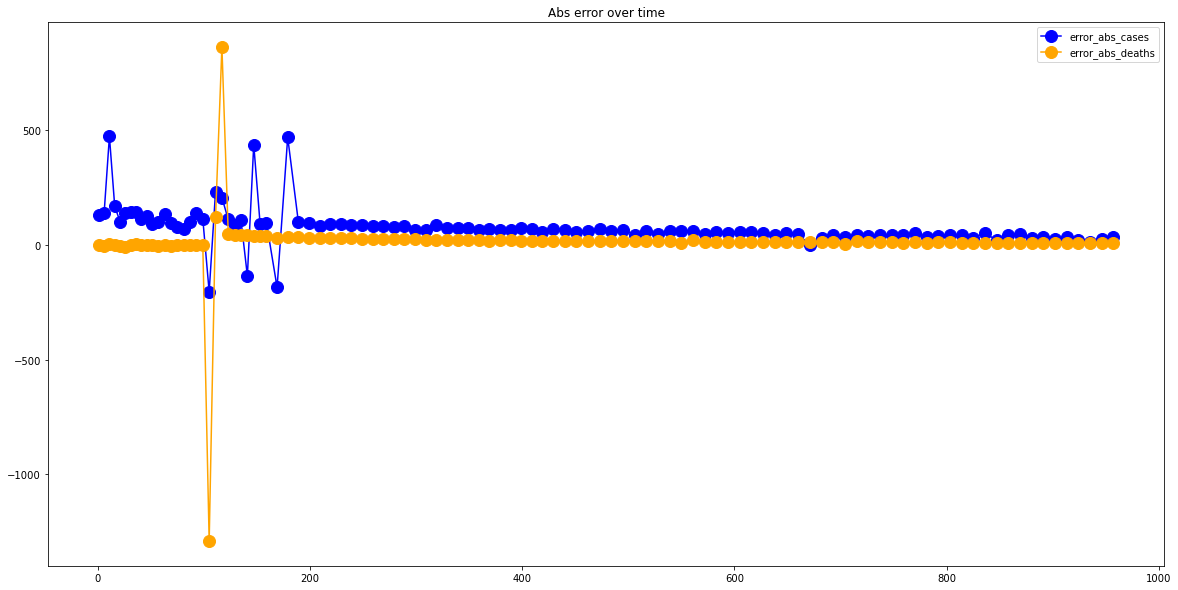

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1528.2368421052631
RMSE =  4783.8590978854145
-- United Kingdom performances for deaths --
MAE =  234.6578947368421
RMSE =  561.35646335227


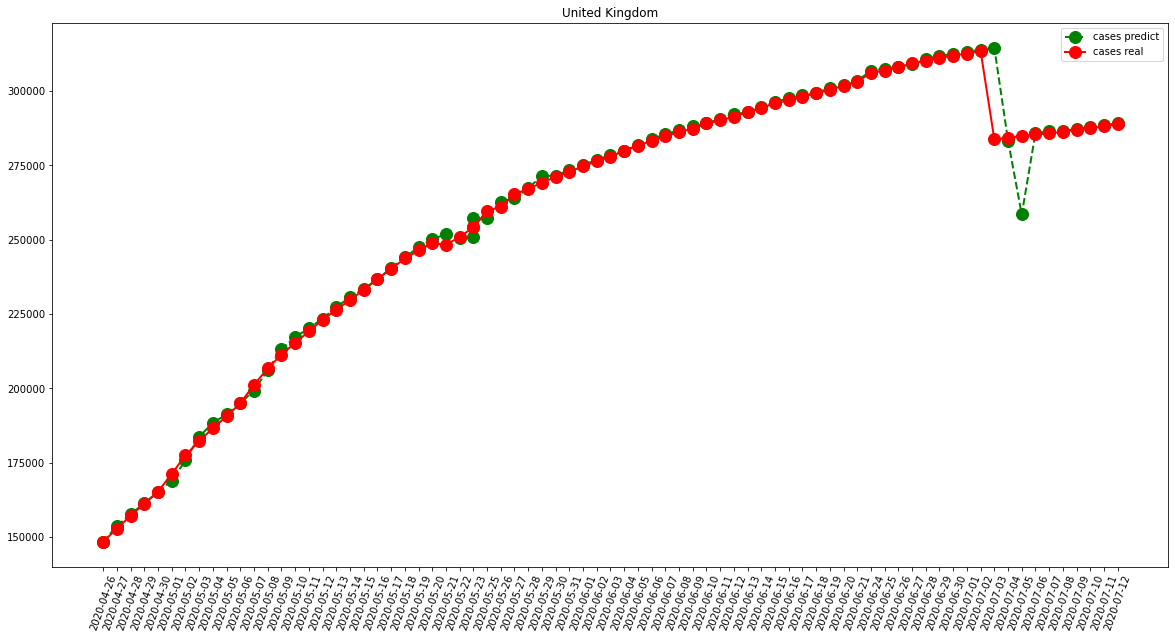

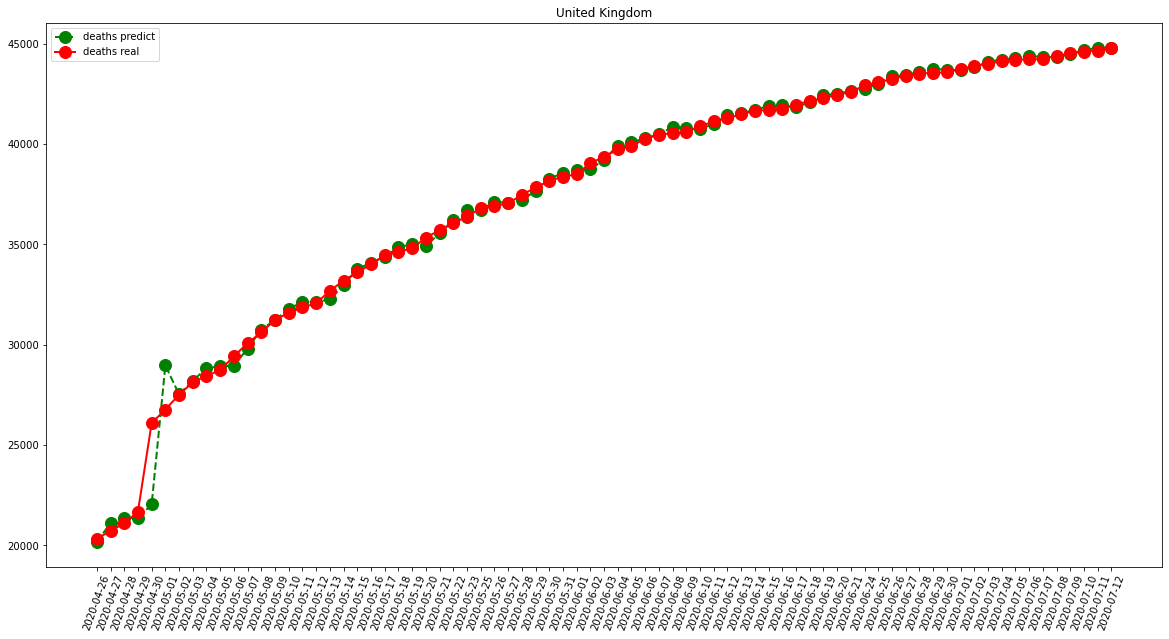

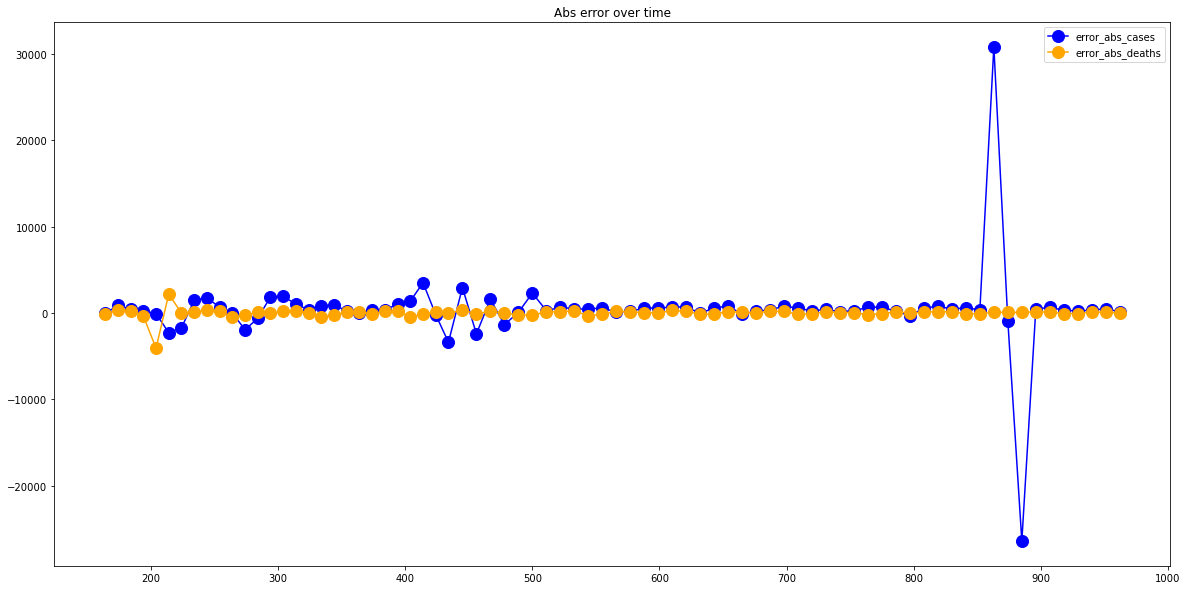

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  297.10526315789474
RMSE =  425.80468712655966
-- Germany performances for deaths --
MAE =  29.86842105263158
RMSE =  49.93943700544743


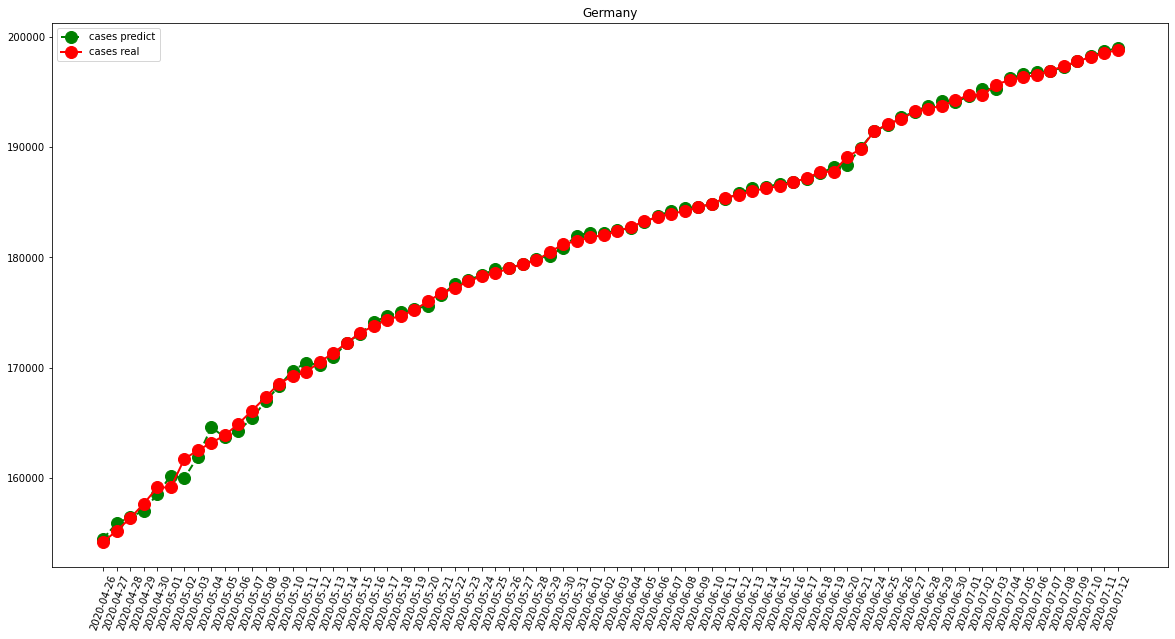

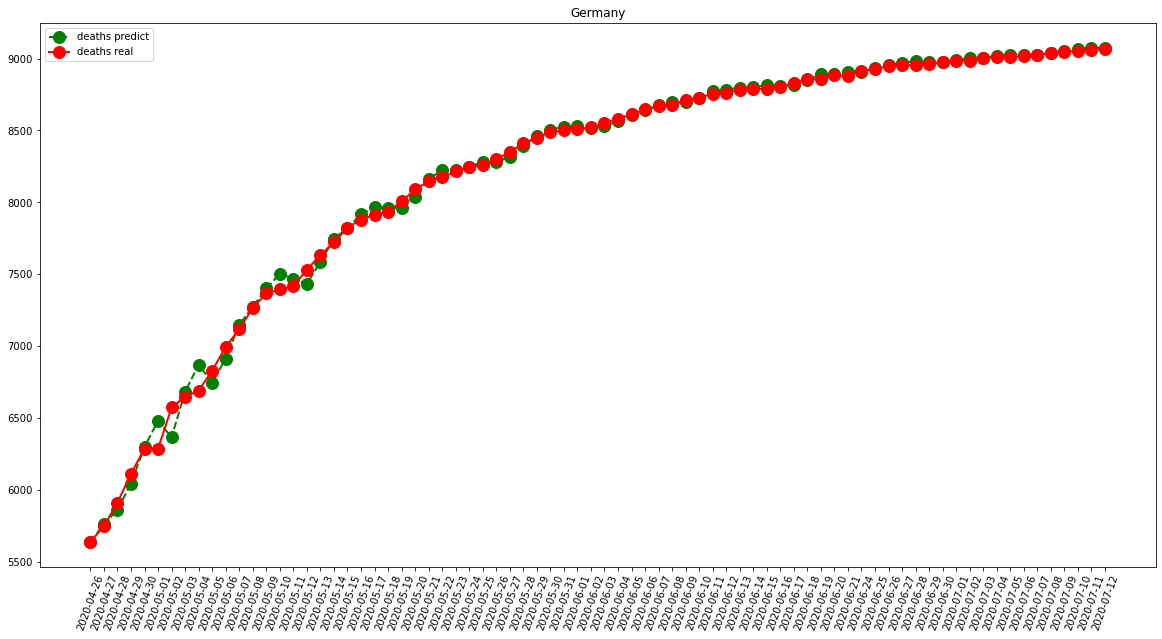

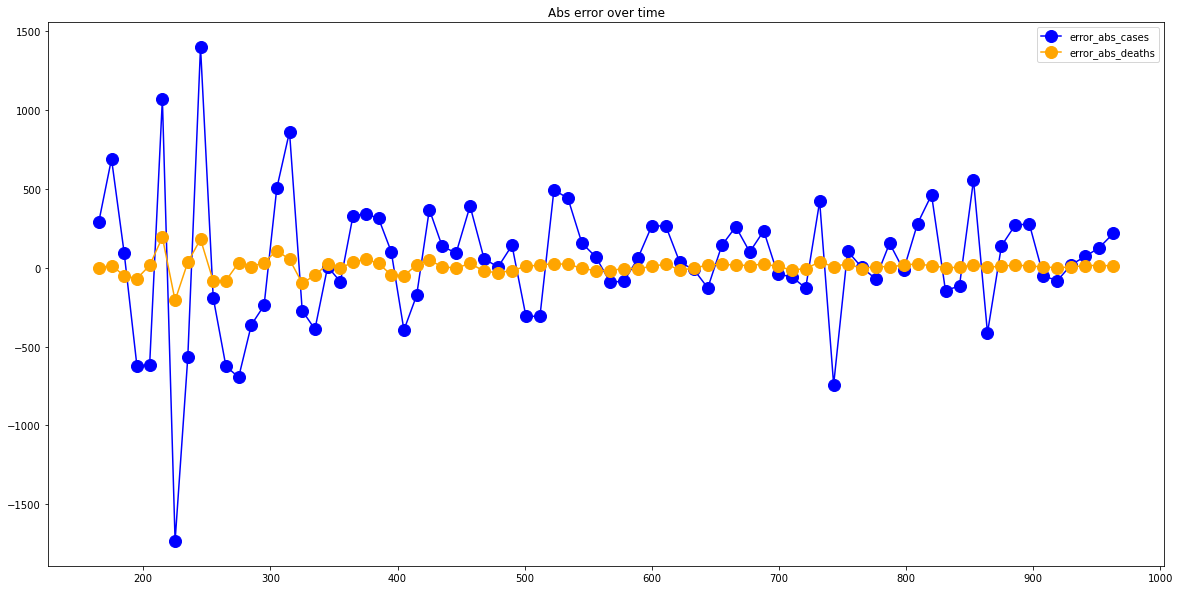

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  333.0131578947368
RMSE =  431.24719678722795
-- Iran performances for deaths --
MAE =  18.263157894736842
RMSE =  29.293433789125757


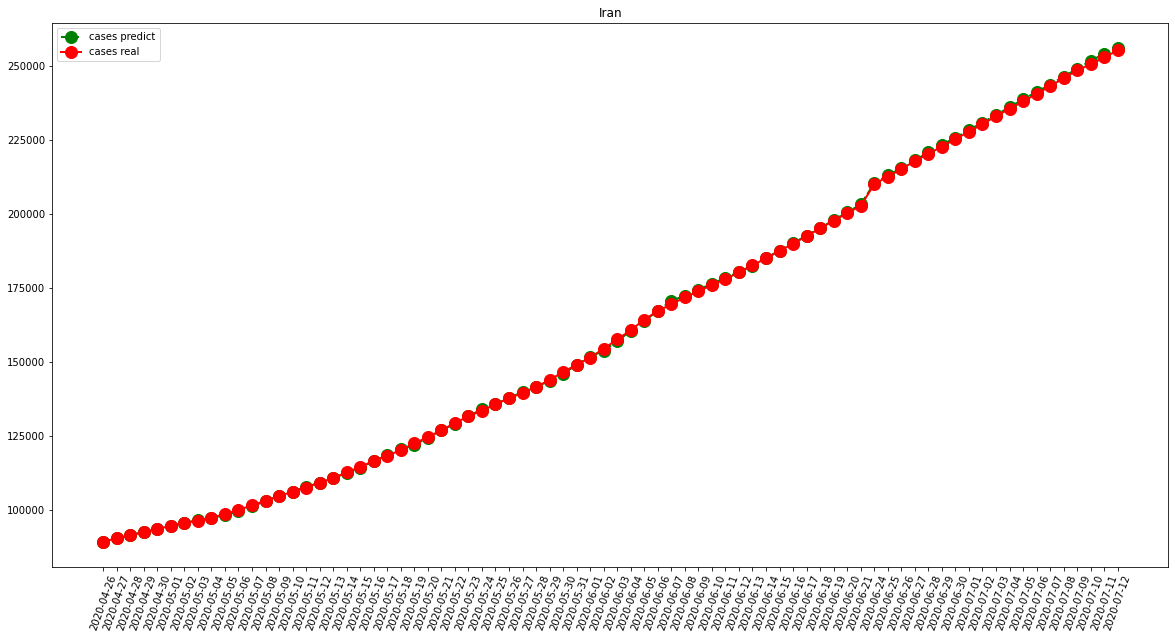

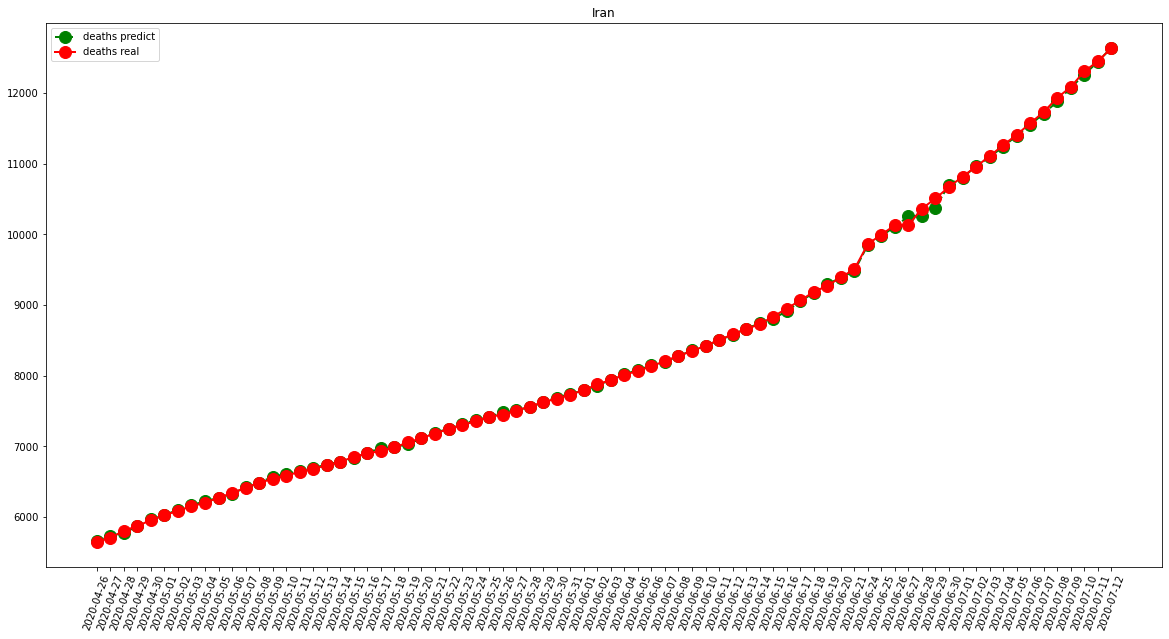

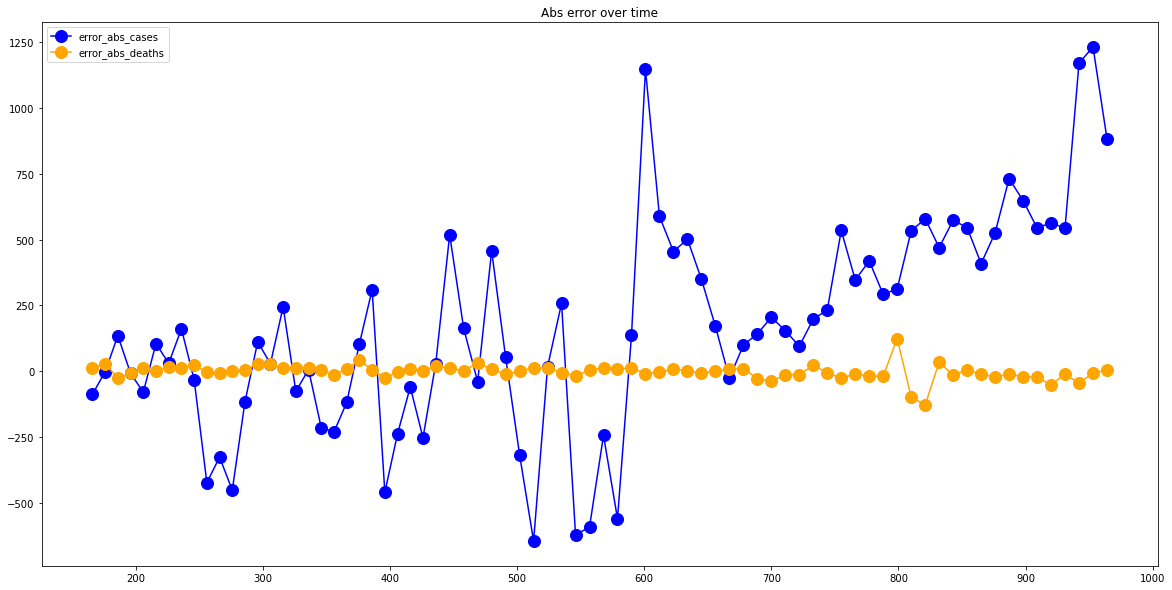

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  246.46052631578948
RMSE =  393.9022554417596
-- Turkey performances for deaths --
MAE =  24.36842105263158
RMSE =  116.43453096053592


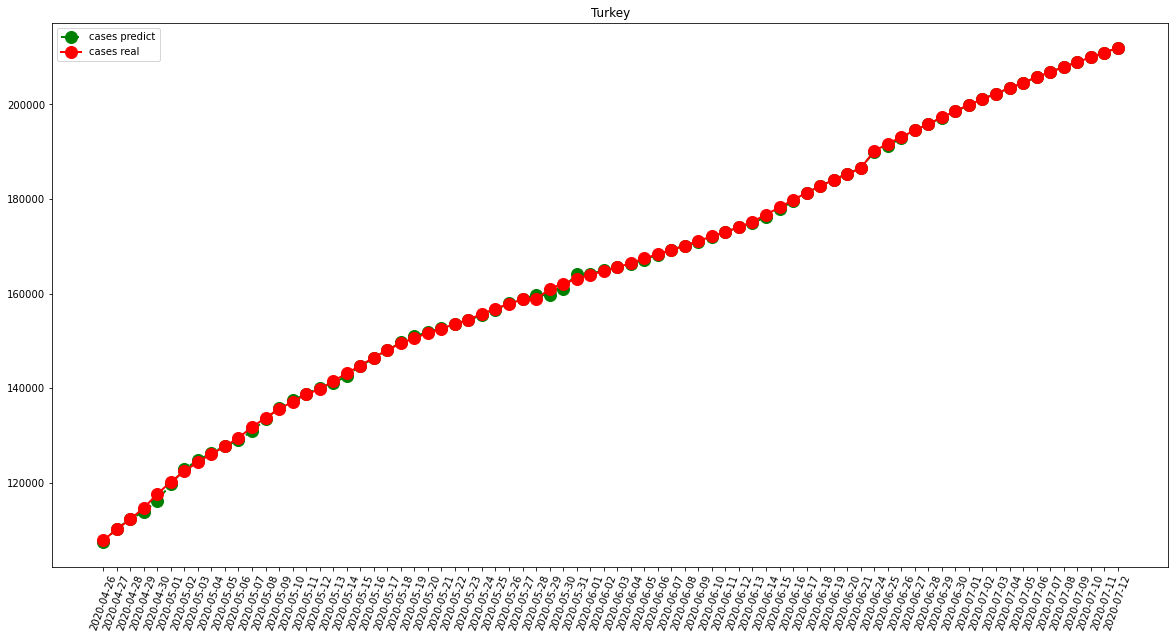

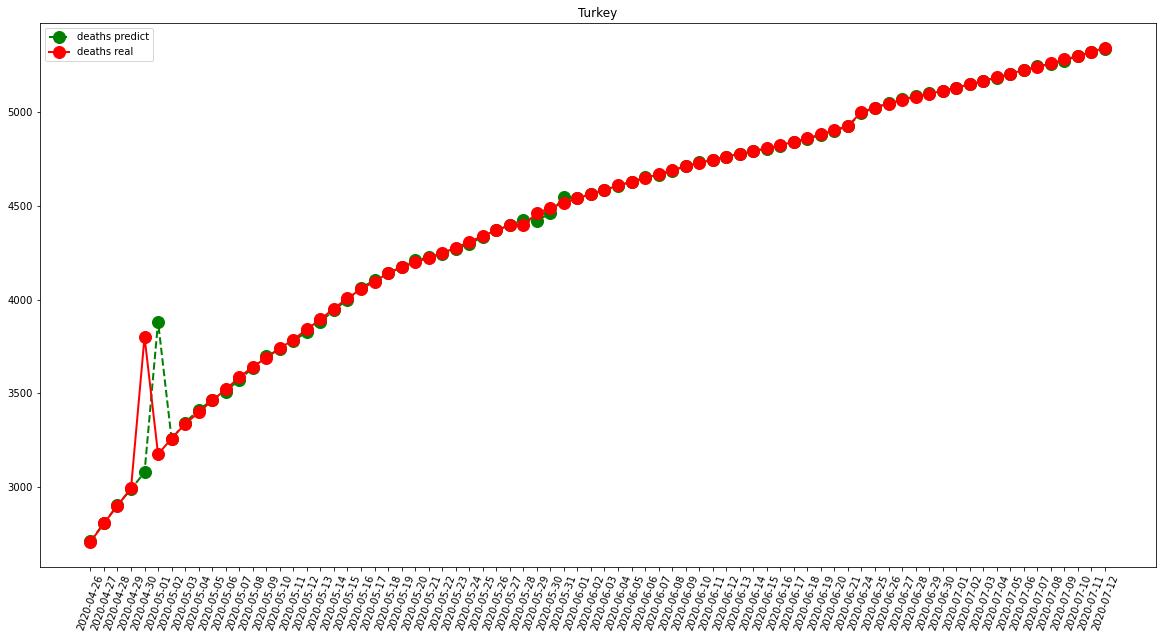

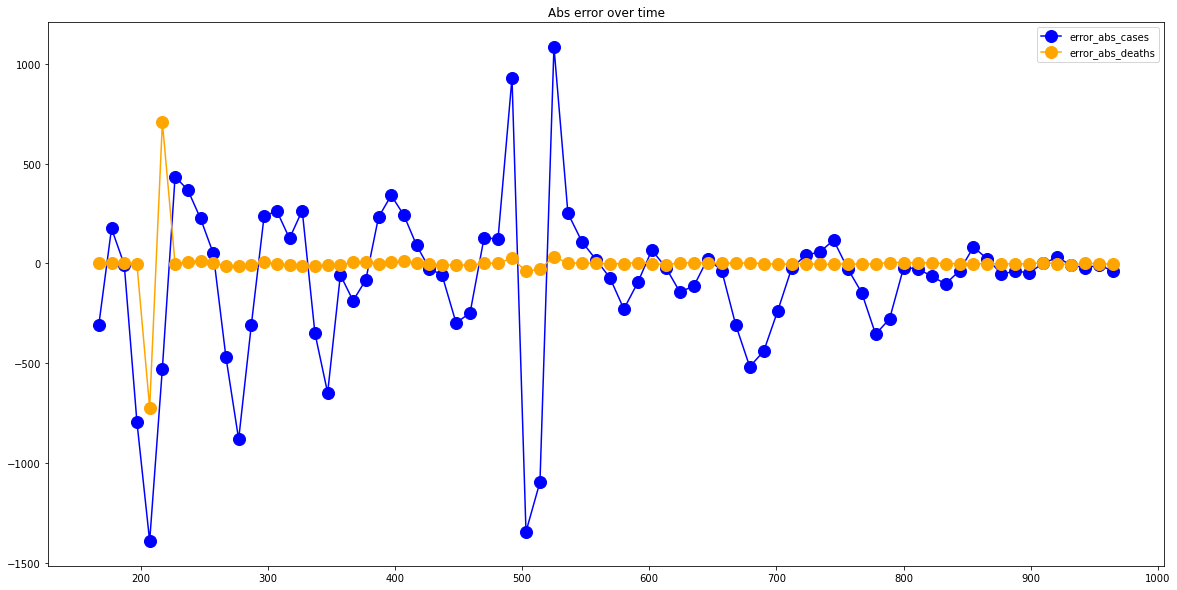

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  9126.163265306122
RMSE =  11762.742898227263
-- Brazil performances for deaths --
MAE =  366.2244897959184
RMSE =  455.22394130218356


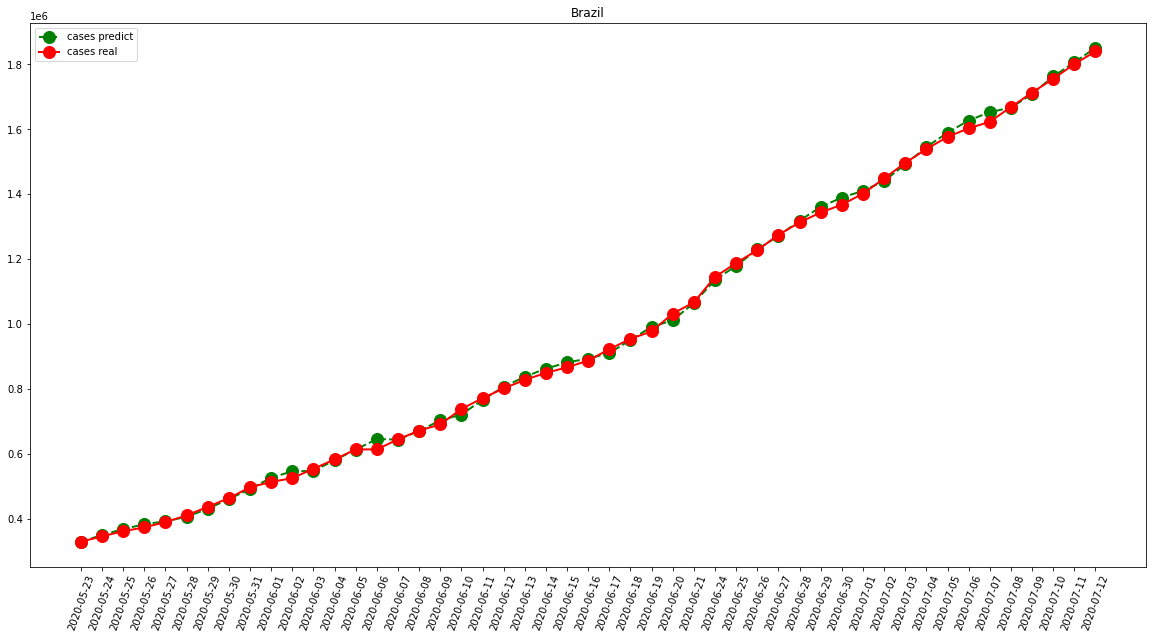

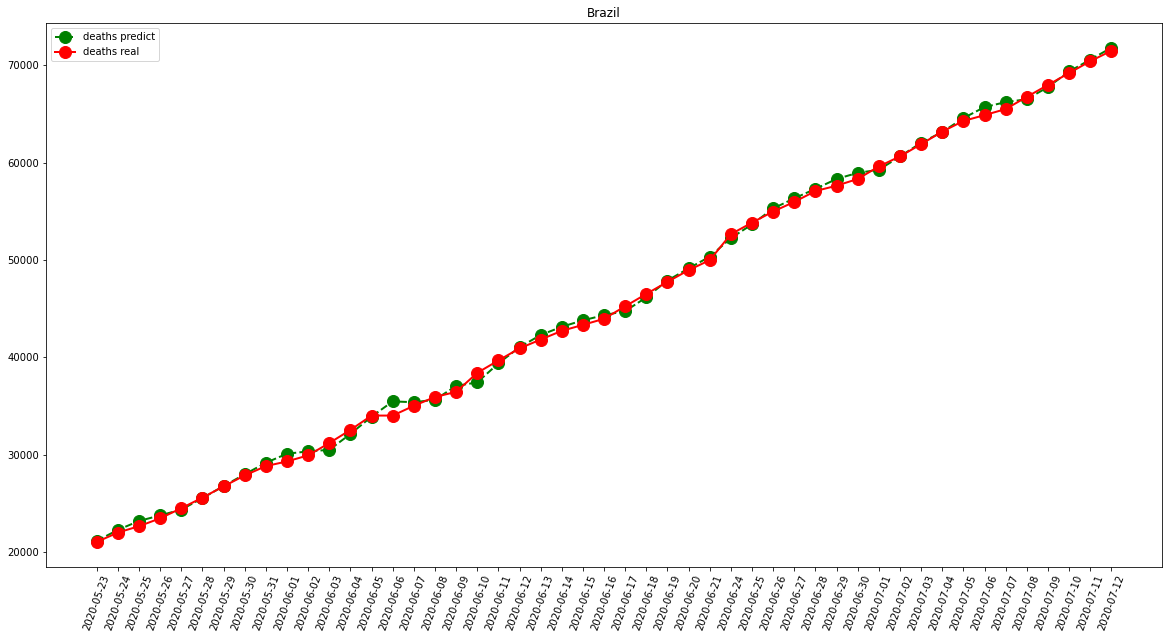

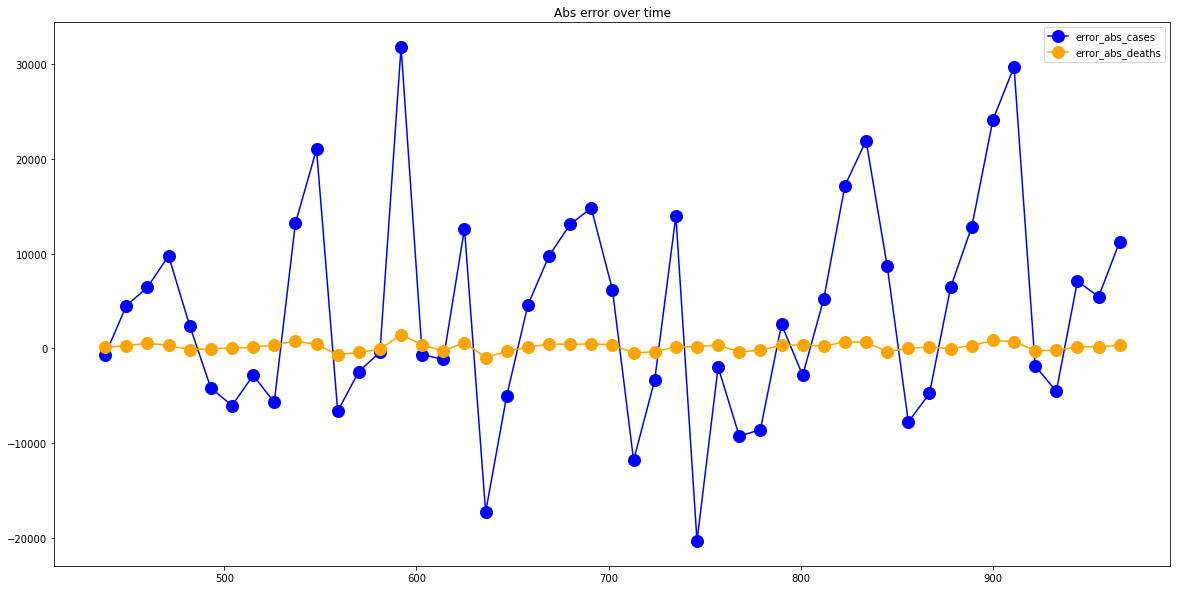

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)